In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [2]:
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values

In [3]:
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [4]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [5]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


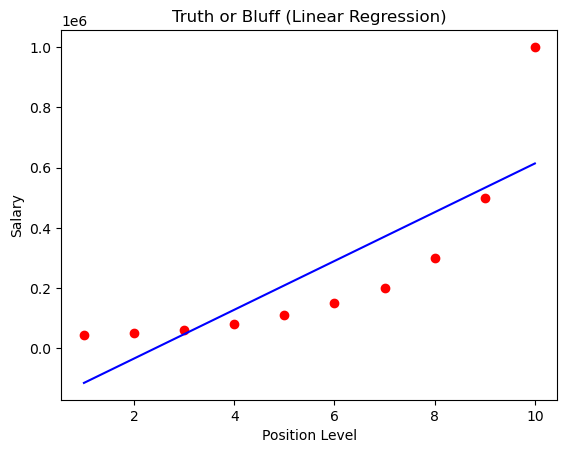

In [6]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

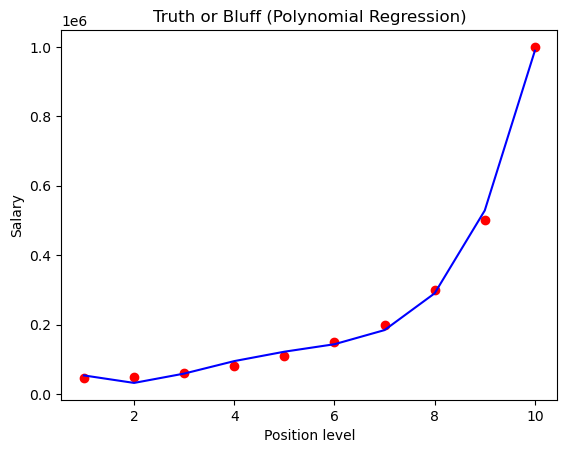

In [7]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\deeks\AppData\Local\Temp\ipykernel_51744\3029784565.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


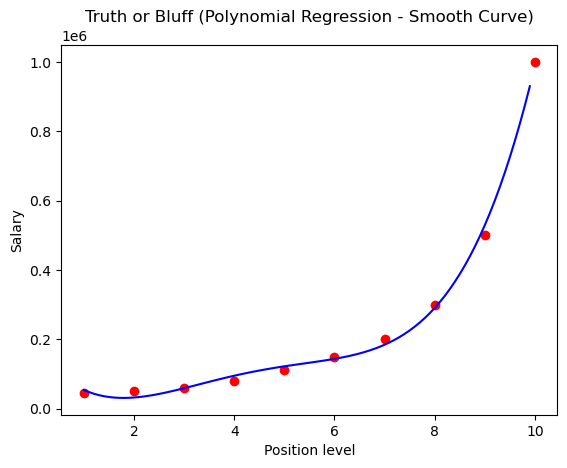

In [8]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [9]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)

Linear Regression Prediction for Level 6.5: [330378.78787879]


In [10]:
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)

Polynomial Regression Prediction for Level 6.5: [158862.45265153]


In [11]:
#MSE for linear regression
from sklearn.metrics import mean_squared_error
y_lin_pred = lin_reg.predict(X)
mse_lin = mean_squared_error(y, y_lin_pred)
print("Mean Squared Error (Linear Regression):", mse_lin)

#MSE for polynomial regression
y_poly_pred = lin_reg_2.predict(X_poly)
mse_poly = mean_squared_error(y, y_poly_pred)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

Mean Squared Error (Linear Regression): 26695878787.878788
Mean Squared Error (Polynomial Regression): 210343822.8438184


## CAR PRICE PREDICTION

In [119]:
#Load the dataset and identify the relevant columns.
df = pd.read_csv('CarPrice_Assignment.csv')

In [120]:
#2. Use: Engine size as the input feature 
# Car price as the output variable
X = df[['enginesize']]
y = df['price']

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

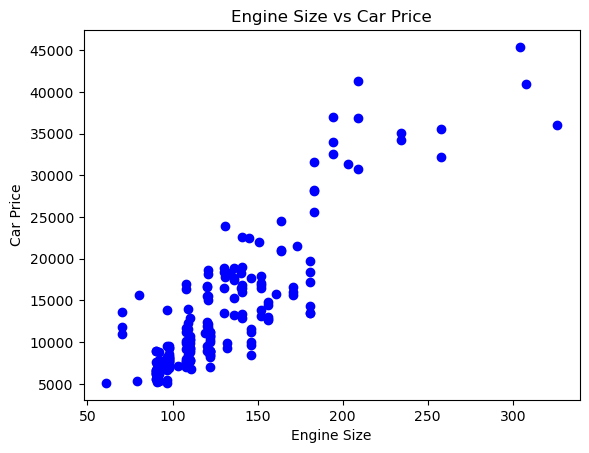

In [122]:
#3. Visualize the relationship between engine size and price.
plt.scatter(X, y, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs Car Price')
plt.show()

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [124]:
#4. Build a predictive model to estimate car price based on engine size
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg_4 = PolynomialFeatures(degree=4)
X_train_poly_4 = poly_reg_4.fit_transform(X_train)
X_test_poly_4  = poly_reg_4.transform(X_test)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_train_poly_4, y_train)


LinearRegression()

In [125]:
#5. Predict the price for a car with: Engine size = 200
engine_size = 200
engine_size_poly = poly_reg.fit_transform([[engine_size]])
predicted_price = lin_reg_2.predict(engine_size_poly)
print(f"Predicted price for a car with engine size {engine_size}: {predicted_price}")

Predicted price for a car with engine size 200: [30530.56211052]


In [126]:
#6 Increase the flexibility of your model and observe how the curve changes.
poly_reg_11 = PolynomialFeatures(degree=11)
X_train_poly_11 = poly_reg_11.fit_transform(X_train)

lin_reg_11 = LinearRegression()
lin_reg_11.fit(X_train_poly_11, y_train)


LinearRegression()

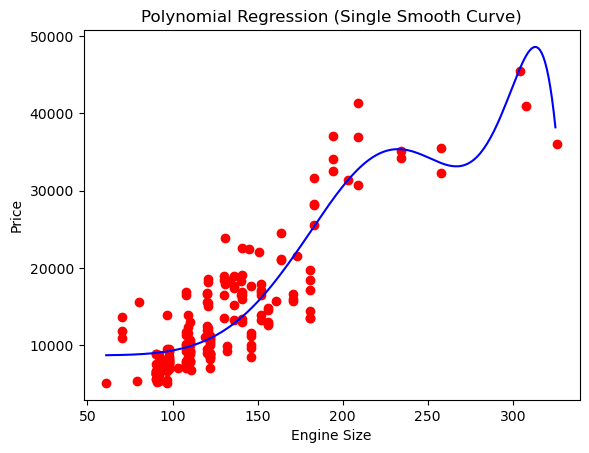

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select ONE numeric column
X = df[['enginesize']].values
y = df['price'].values

# Create smooth grid
X_grid = np.arange(X.min(), X.max(), 1)
X_grid = X_grid.reshape(-1, 1)

# Plot
plt.scatter(X, y, color='red')
plt.plot(
    X_grid,
    lin_reg_2.predict(poly_reg.transform(X_grid)),
    color='blue'
)
plt.title('Polynomial Regression (Single Smooth Curve)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


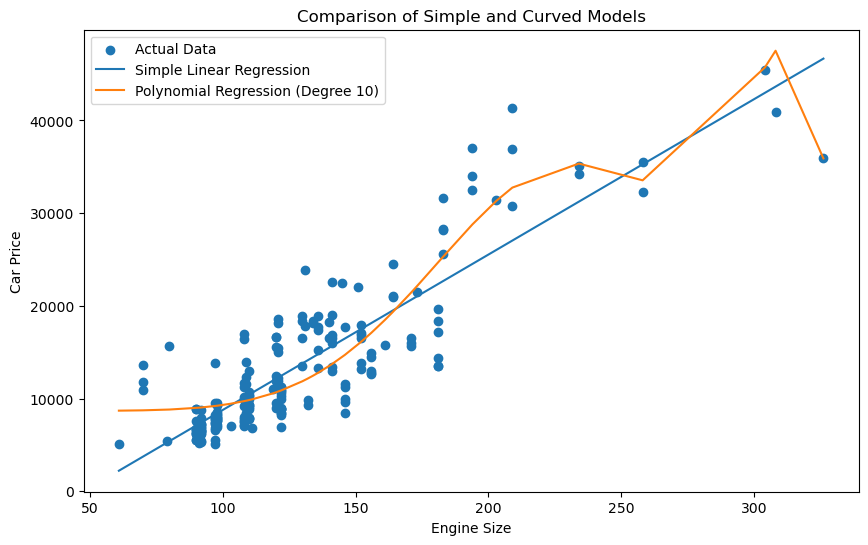

In [128]:
#7. Compare predictions from: a simple straight-line model and a curved model
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X, y)

# Sort X for smooth plotting
X_sorted = np.sort(X, axis=0)

# Predictions using sorted X
y_simple_sorted = lin_reg_simple.predict(X_sorted)
y_curved_sorted = lin_reg_2.predict(poly_reg.transform(X_sorted))

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X_sorted, y_simple_sorted, label='Simple Linear Regression')
plt.plot(X_sorted, y_curved_sorted, label='Polynomial Regression (Degree 10)')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Comparison of Simple and Curved Models')
plt.legend()
plt.show()


### 8. Analyze which model: captures the trend better and gives more realistic predictions
 The Polynomial Regression model captures the trend better and provides more realistic predictions compared to the Simple Linear Regression model. This is evident from the lower Mean Squared Error (MSE) and higher R² Score of the Polynomial model, indicating a better fit to the data and more accurate predictions of car prices based on engine size.

In [129]:
#9. Evaluate prediction errors and interpret them in business terms.

from sklearn.metrics import mean_squared_error, r2_score

y_pred_4 = lin_reg_4.predict(X_test_poly_4)

mse_poly_4 = mean_squared_error(y_test, y_pred_4)
r2_poly_4 = r2_score(y_test, y_pred_4)

print("Polynomial Regression (deg 4) MSE:", mse_poly_4)
print("Polynomial Regression (deg 4) R²:", r2_poly_4)


y_simple_pred = lin_reg_simple.predict(X_test)

mse_simple = mean_squared_error(y_test, y_simple_pred)
r2_simple = r2_score(y_test, y_simple_pred)

print("Simple Linear Regression MSE:", mse_simple)
print("Simple Linear Regression R²:", r2_simple)


Polynomial Regression (deg 4) MSE: 11649790.06441771
Polynomial Regression (deg 4) R²: 0.8524297352148219
Simple Linear Regression MSE: 15405952.078282746
Simple Linear Regression R²: 0.8048496655399958


c:\Users\deeks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Business terms : This indicates that the Polynomial Regression model provides a better fit to the data, capturing the non-linear relationship between engine size and car price more effectively. In business terms, using the Polynomial Regression model could lead to more accurate pricing strategies based on engine size, potentially improving profitability and customer satisfaction.

### 10. Answer the following: Why does a straight-line model fail here?

A straight-line model fails here because the relationship between engine size and car price is non-linear.

### What risk occurs if the curve becomes too flexible?

Overfitting: The model may capture noise in the training data, leading to poor generalization on new data.

### Which model would you recommend for production and why?

I would recommend the Polynomial Regression model for production because it has a lower Mean Squared Error (MSE) compared to the Simple Linear Regression model and a better r2_score. This indicates that the Polynomial model provides more accurate predictions of car prices based on engine size, which is crucial for business decisions related to pricing strategies and market analysis.


c:\Users\deeks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


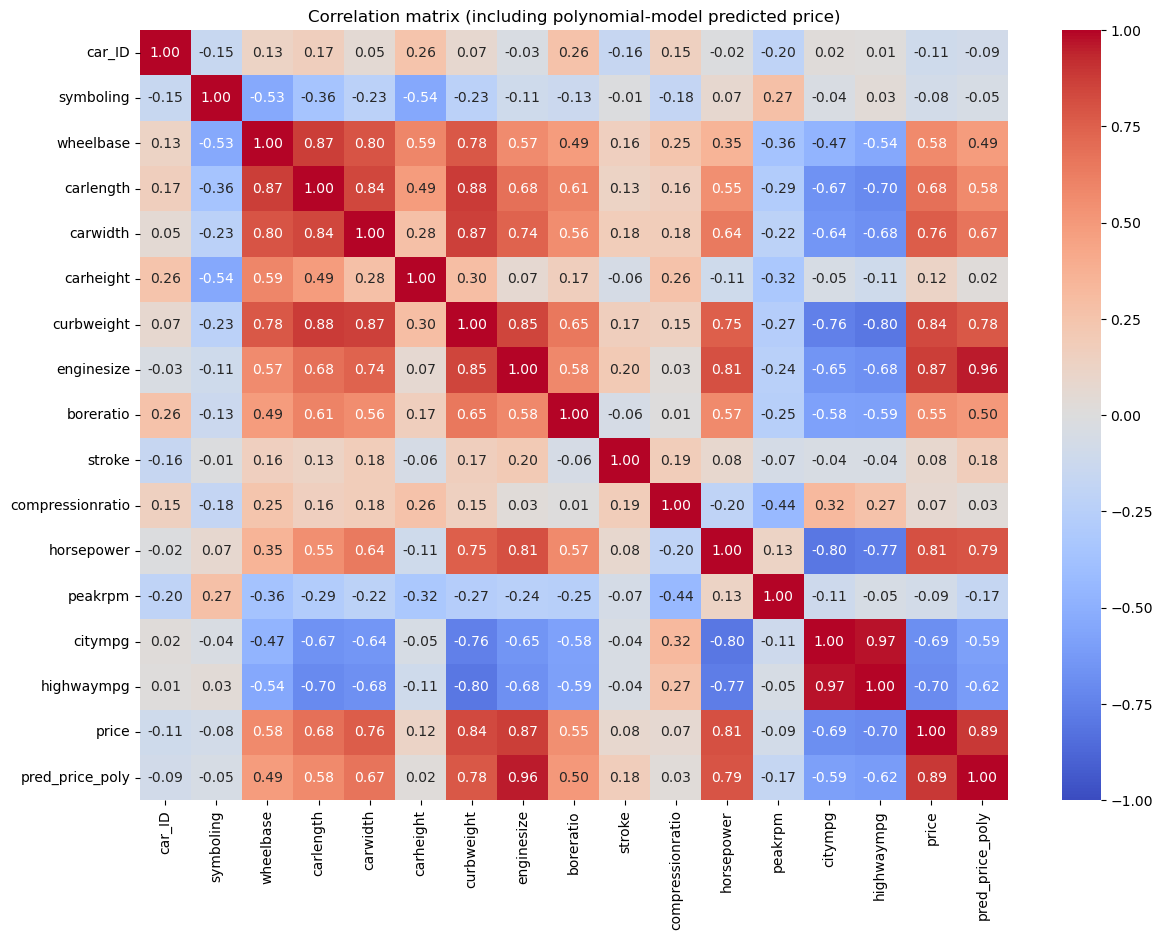

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict price for all rows using your polynomial model (uses enginesize)
pred_price_poly = lin_reg_2.predict(poly_reg.transform(df[['enginesize']]))

# Prepare numeric dataframe and include the polynomial model predictions
num_df = df.select_dtypes(include=['number']).copy()
num_df['pred_price_poly'] = pred_price_poly

# Correlation matrix an1d heatmap
corr = num_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (including polynomial-model predicted price)')
plt.show()

car_ID – weak negative correlation (-0.11)

citympg – strong negative correlation (-0.69)

highwaympg – strong negative correlation (-0.70)


symboling – weak negative correlation (-0.08)

stroke – weak positive correlation (0.08)

compressionratio – very weak positive correlation (0.07)

peakrpm – weak negative correlation (-0.09)

carheight – very weak positive correlation (0.12)

wheelbase – moderate positive correlation (0.58)

carlength – strong positive correlation (0.68)

boreratio – moderate positive correlation (0.55)

carwidth – strong positive correlation (0.76)

curbweight – very strong positive correlation (0.84)

enginesize – very strong positive correlation (0.87)

horsepower – very strong positive correlation (0.81)




In [138]:
# Keep only strong / meaningful numeric features
selected_features = [
    'wheelbase',
    'carlength',
    'carwidth',
    'curbweight',
    'enginesize',
    'boreratio',
    'horsepower',
    'citympg',
    'highwaympg'
]

reduced_df = df[selected_features]


In [139]:
corr = reduced_df.corr()

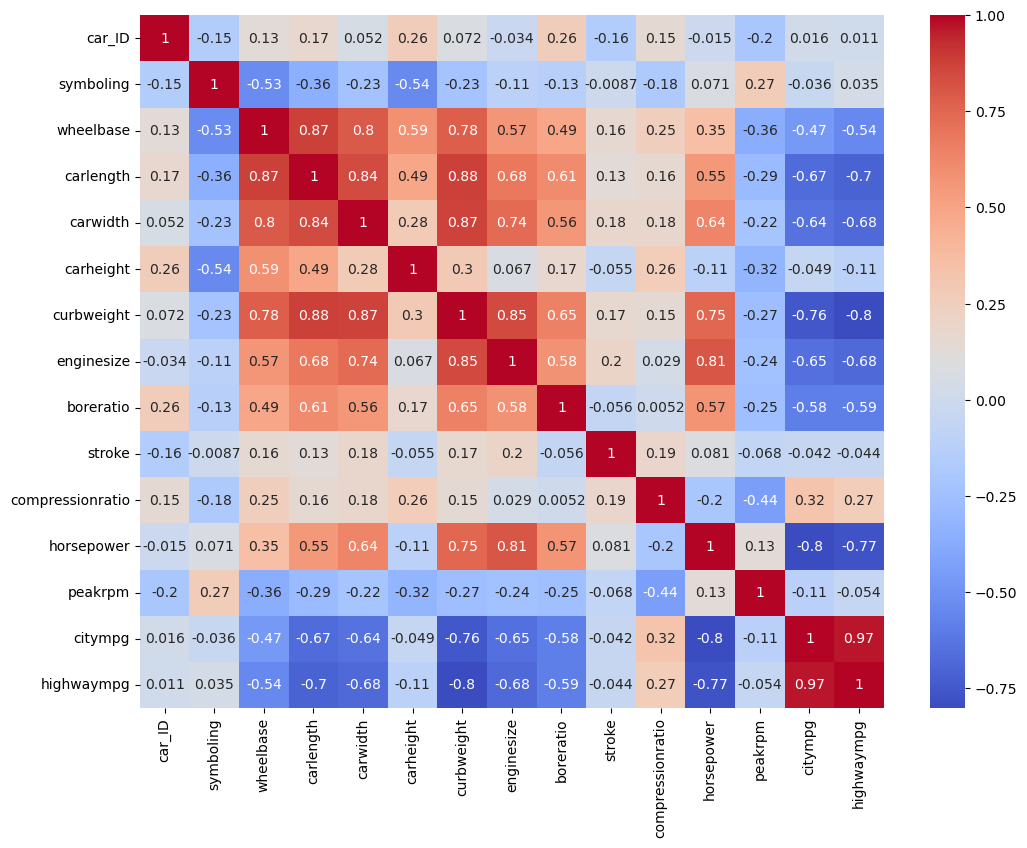

In [141]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

Feature - Feature

wheelbase - carlength 0.87

wheelbase - carwidth 0.8

wheelbase - curbweight 0.78

carlength - curbweight 0.88

carlength - carwidth 0.84

carwidth - curbweight 0.87

curbweight - horsepower 0.75

curbweight - enginesize 0.85

enginesize - horsepower 0.81

citympg - highwaympg 0.97

8 unique columns

You have to remove the columns which have high feature - feature relation and also less relation with the target variable

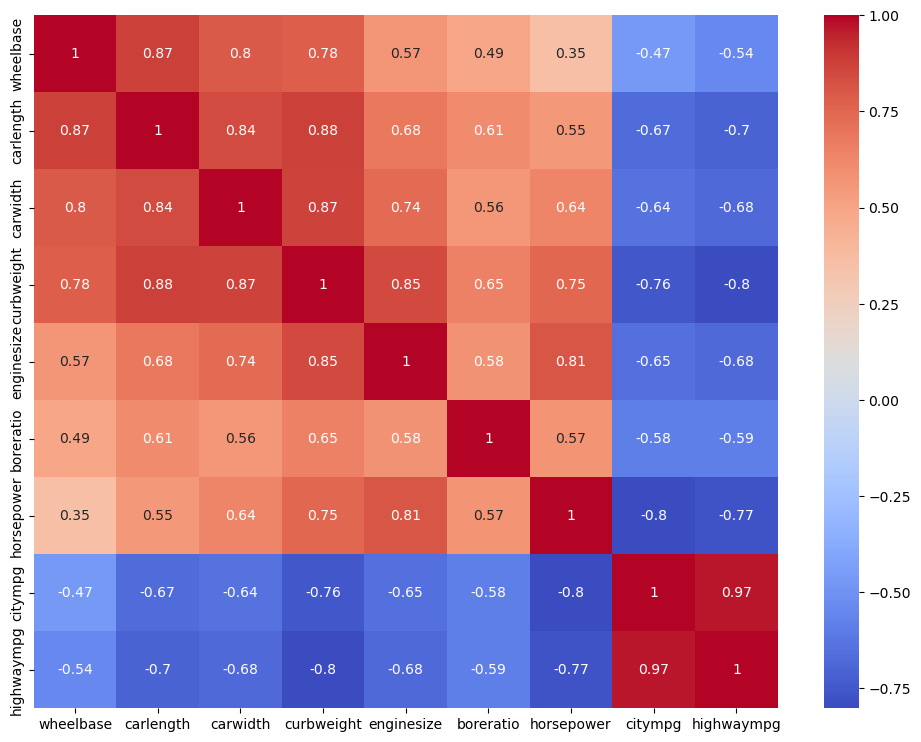

In [146]:
# drop multiple columns by passing a list of column names and specifying axis=1
x = df.drop(['peakrpm', 'car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio','price'], axis=1)
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

In [159]:
# Select only numeric features
X = df.select_dtypes(include=['number']).drop(
    ['price', 'peakrpm', 'car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio'],
    axis=1
)
y = df['price']

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [164]:
from sklearn.metrics import r2_score
y_train_pred = mlr.predict(X_train)
print("Training R²:", r2_score(y_train, y_train_pred))

Training R²: 0.8205339925962754


In [ ]:
y_test_pred = mlr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing R²:", r2_test)

Testing R²: 0.8185601083027604


### Regularization in Linear Regression - Ridge & Lasso

Problems - high variance, poor generalization and complexity

Why - 
simpler models

better generalization

feature selection

In [167]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
r2_ridge_test  = r2_score(y_test,  ridge.predict(X_test))

# Lasso Regression
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train, y_train)
r2_lasso_test  = r2_score(y_test,  lasso.predict(X_test))

print("Ridge R² (test) : ", r2_ridge_test)
print("Lasso R² (test) : ", r2_lasso_test)



Ridge R² (test) :  0.8183904281886796
Lasso R² (test) :  0.8184918267538458


In [177]:
from sklearn.linear_model import RidgeCV
 
alphas = np.arange(0.1, 10, 0.05)

# provide the alphas array to RidgeCV and fit the model instance
model = RidgeCV(alphas=alphas)
model.fit(X_train, y_train)

# use the fitted model instance to predict
r2_RidgeCV = r2_score(y_test, model.predict(X_test))

print("RidgeCV chosen alpha:", model.alpha_)
print("RidgeCV R² (test):", r2_RidgeCV)


RidgeCV chosen alpha: 9.950000000000003
RidgeCV R² (test): 0.8179031518944826


In [179]:
from sklearn.linear_model import LassoCV
 
alphas = np.arange(0.1, 10, 0.05)

# provide the alphas array to RidgeCV and fit the model instance
model = LassoCV(alphas=alphas)
model.fit(X_train, y_train)

# use the fitted model instance to predict
r2_LassoCV = r2_score(y_test, model.predict(X_test))

print("LassoCV chosen alpha:", model.alpha_)
print("LassoCV R² (test):", r2_LassoCV)

LassoCV chosen alpha: 9.950000000000003
LassoCV R² (test): 0.817855782818988


In [180]:
dataset = pd.read_csv('Bike_Rental_data(in).csv.crdownload')

In [182]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57436 entries, 0 to 57435
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     57436 non-null  float64
 1   dteday      57436 non-null  object 
 2   season      57436 non-null  object 
 3   yr          57436 non-null  object 
 4   mnth        57436 non-null  object 
 5   hr          57436 non-null  float64
 6   holiday     57436 non-null  object 
 7   weekday     57436 non-null  float64
 8   workingday  57436 non-null  object 
 9   weathersit  57436 non-null  object 
 10  temp        57435 non-null  object 
 11  atemp       57435 non-null  object 
 12  hum         57435 non-null  object 
 13  windspeed   57435 non-null  object 
 14  casual      57435 non-null  object 
 15  registered  57435 non-null  object 
 16  cnt         57435 non-null  float64
dtypes: float64(4), object(13)
memory usage: 7.4+ MB


Bike rental

descriptive stats

handle missing values

if error ? in this data handle it

check distributions numerical and categorical data

correlation matrix - draw insights

if you do hypothesis testing

encoding (one hot / label)

scaling standard normalization

split data, linear regression, polynomial regression, ridge, lasso, best alpha value for it ridgeCv and lassoCV 

r2score, mse, rmse, mae for train and testing data both

In [ ]:
X = df.iloc()